In [1]:
from scipy.io.arff import loadarff
from src.dataset import Dataset
from src.utils import *
from src.import_datasets import *

In [2]:
dataset_name="COMPAS"

# Import and discretize data

In [3]:
data=import_process_compas()

In [4]:
data.head()

,age_cat,c_charge_degree,race,sex,priors_count,length_of_stay,class
0,Greater than 45,F,Other,Male,0,<week,Medium-Low
1,25 - 45,F,African-American,Male,0,1w-3M,Medium-Low
2,Less than 25,F,African-American,Male,>3,<week,Medium-Low
5,25 - 45,M,Other,Male,0,<week,Medium-Low
6,25 - 45,F,Caucasian,Male,>3,<week,Medium-Low


# Train and explain dataset

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_explain = train_test_split(data, test_size=0.2, random_state=42, stratify=data["class"])

In [6]:
attributes=getAttributes(data)
d_train=Dataset(df_train.values, attributes)
d_explain=Dataset(df_explain.values, attributes, column_encoders=d_train._column_encoders)

In [7]:
df_train.head(5)

,age_cat,c_charge_degree,race,sex,priors_count,length_of_stay,class
2139,25 - 45,F,African-American,Male,>3,<week,High
4139,Less than 25,M,African-American,Male,[1-3],>3Months,High
2943,Greater than 45,F,African-American,Female,0,<week,Medium-Low
4305,Greater than 45,F,Caucasian,Male,[1-3],<week,Medium-Low
5882,Greater than 45,M,Hispanic,Male,[1-3],<week,Medium-Low


# Classifier training

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(d_train.X_numpy(), d_train.Y_numpy())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# X-PLAIN

X-PLAIN input: classifier (model agnostic) and the training data to compute the locality

In [9]:
from src.LACE_explainer import LACE_explainer
explainer = LACE_explainer(clf, d_train, dataset_name="COMPAS")

# Explain instances

Input: instance to explain and the target class (the class w.r.t. the prediction difference is computed)

In [10]:
i=1
instance=d_explain[i]
infos={"d":dataset_name, "model":"RF"}
instance=d_explain[i]
explanation = explainer.explain_instance(instance, "High")
explanation.plotExplanation()

compute_lace_step k=70
compute_lace_step k=140
compute_lace_step k=210
['Rule_1={priors_count=0}']


compute_lace_step k=70
['Rule_1={priors_count=[1-3]}']


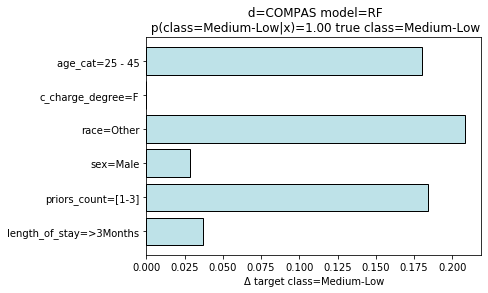

In [11]:
i=0
instance=d_explain[i]
infos={"d":dataset_name, "model":"RF"}
instance=d_explain[i]
explanation = explainer.explain_instance(instance, "Medium-Low")
explanation.plotExplanation()